In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import least_squares, curve_fit

%matplotlib inline

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/vel_nir_mef_Kd_UV_raw_data/'

data = pd.read_csv(workdir + '20230512_nir_titri1.csv')
for name in data.columns[2:]:
    x = data[name][510:610]  - data[data.columns[1]][510:610]
    y = sum(x)/len(x)
    data[name] = data[name] - y
abs_2uM = data.iloc[317-190, 2:]
#print(abs_2uM)

data = pd.read_csv(workdir + '20230515_nir5uM_titri.csv')
for name in data.columns[2:]:
    x = data[name][250:280]  - data[data.columns[1]][250:280]
    y = sum(x)/len(x)
    data[name] = data[name] - y
abs_5uM = data.iloc[317-200, 2:]
print(abs_5uM)

data = pd.read_csv(workdir + '20230512_nir_titri3.csv')
for name in data.columns[2:]:
    x = data[name][510:610]  - data[data.columns[1]][510:610]
    y = sum(x)/len(x)
    data[name] = data[name] - y
abs_10uM = data.iloc[317-190, 2:]
print(abs_10uM)

prot5uM   -0.001910
nir_1      0.014908
nir_2      0.032398
nir_3      0.050947
nir_4      0.067746
nir_5      0.083172
nir_6      0.098735
nir_7      0.114595
nir_8      0.130553
nir_9      0.143727
nir_10     0.157827
nir_12     0.186520
nir_14     0.213518
nir_16     0.242535
nir_18     0.270631
nir_20     0.296287
nir_24     0.349672
nir_28     0.403635
nir_32     0.459097
nir_40     0.564874
Name: 117, dtype: float64
prot_10uM    0.001883
nir_1        0.037876
nir_2        0.072934
nir_3        0.108542
nir_4        0.143505
nir_5        0.177361
nir_6        0.210222
nir_7        0.241338
nir_8        0.272515
nir_9        0.303843
nir_10       0.334183
nir_12       0.392295
nir_14       0.450591
nir_16       0.506638
nir_18       0.566182
nir_20       0.622615
nir_22       0.681602
nir_24       0.738405
Name: 127, dtype: float64


In [60]:


def pl_stoich(Pt, Lt, Kd, n):
    return 1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n))


In [61]:
adds_2uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24]
conc_2uM = [x*600/(2000+x) for x in adds_2uM]
prot_conc_2uM = [8*500/(2000+x) for x in adds_2uM]


adds_5uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 40]
conc_5uM = [x*1500/(2000+x) for x in adds_5uM]
prot_conc_5uM = [20*500/(2000+x) for x in adds_5uM]

adds_10uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24]
conc_10uM = [x*3000/(2000+x) for x in adds_10uM]
prot_conc_10uM = [40*500/(2000+x) for x in adds_10uM]

In [62]:
def res_float_nir(x):
    rs = []
    rs.extend(abs_2uM[i] - abs_2uM[0] - x[3]*conc_2uM[i] - x[0]*pl_stoich(2*2000/(2000+ adds_2uM[i]), conc_2uM[i], x[1], x[2]) for i in range(len(conc_2uM)) )
    rs.extend(abs_5uM[i] - abs_5uM[0] - x[4]*conc_5uM[i] - x[0]*pl_stoich(5*2000/(2000+ adds_5uM[i]), conc_5uM[i], x[1], x[2]) for i in range(len(conc_5uM)) )
    rs.extend(abs_10uM[i] - abs_10uM[0] - x[5]*conc_10uM[i] - x[0]*pl_stoich(10*2000/(2000+ adds_10uM[i]), conc_10uM[i], x[1], x[2]) for i in range(len(conc_10uM)) )
    return rs


In [63]:
res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007,.007]), bounds=[(0.0001,.1,.5, .0001,.0001,.0001), (.01,50,3, .1,.1,.1)])

x = res_nir.x  # fit parameters
x_orig = x

print('Fit of full data from Science paper:')
print(
      'delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)=', x_orig[0],
      '\nKd (uM)=', x_orig[1],
      '\nN(stoichiometry)=', x_orig[2],
      '\nEpsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)=', x_orig[3],
      '\nEpsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)=', x_orig[4],
      '\nEpsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)=', x_orig[5],
      )

#How to compute standard deviation errors.
#https://stackoverflow.com/questions/42388139/how-to-compute-standard-deviation-errors-with-scipy-optimize-least-squares
print(res_nir.x)

J = res_nir.jac
cov = np.linalg.inv(J.T.dot(J))
var = np.sqrt(np.diagonal(cov))
print(var)

import scipy.linalg as linalg
U, s, Vh = linalg.svd(res_nir.jac, full_matrices=False)
tol = np.finfo(float).eps*s[0]*max(res_nir.jac.shape)
w = s > tol
cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
cov = linalg.inv(res_nir.jac.T @ res_nir.jac)  
perr = np.sqrt(np.diag(cov))  
print(perr)

chi2dof = np.sum(res_nir.fun**2)/(res_nir.fun.size - res_nir.x.size)
cov *= chi2dof
perr = np.sqrt(np.diag(cov)) 
print(perr)

Fit of full data from Science paper:
delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)= 0.004392998270239789 
Kd (uM)= 0.25267070948990966 
N(stoichiometry)= 0.9951160637275309 
Epsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)= 0.01947811470984823 
Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)= 0.018616954925414337 
Epsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)= 0.01945295778360365
[0.004393   0.25267071 0.99511606 0.01947811 0.01861695 0.01945296]
[1.96977333e-01 9.93648555e+01 3.02008682e+01 7.17776342e-02
 4.03297482e-02 5.65276191e-02]
[1.96977333e-01 9.93648555e+01 3.02008682e+01 7.17776342e-02
 4.03297482e-02 5.65276191e-02]
[2.12412011e-04 1.07150850e-01 3.25673368e-02 7.74019598e-05
 4.34898918e-05 6.09569896e-05]


([<matplotlib.axis.XTick at 0x7fec9e914760>,
 <a list of 5 Text major ticklabel objects>)

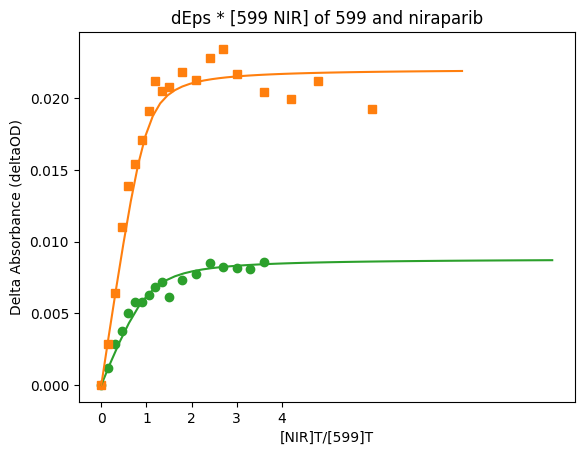

In [67]:
dePL_2 = [abs_2uM[i] - abs_2uM[0] - x[3] * conc_2uM[i] for i in range(len(conc_2uM))]
dePL_5 = [abs_5uM[i] - abs_5uM[0] - x[4] * conc_5uM[i] for i in range(len(conc_5uM))]
#dePL_10 = [abs_10uM[i] - abs_10uM[0] - x[5] * conc_10uM[i] for i in range(len(conc_10uM))]

plt.figure()
plt.plot([600*add/(500*8) for add in adds_2uM], dePL_2, 'o', label='[ABLER]T = 2 uM', color='tab:green')
plt.plot([1500*add/(500*20) for add in adds_5uM], dePL_5, 's', label='[ABLER]T = 5 uM', color='tab:orange')
#plt.plot([3000*add/(500*40) for add in adds_10uM], dePL_10, 'X', label='[ABLER]T = 10 uM')

fit_dePL_2 = [x[0] * pl_stoich(2, np.linspace(0,20,50)[i], x[1], x[2]) for i in range(50)]
fit_dePL_5 = [x[0] * pl_stoich(5, np.linspace(0,40,50)[i], x[1], x[2]) for i in range(50)]
#fit_dePL_10 = [x[0] * pl_stoich(10, np.linspace(0,80,50)[i], x[1], x[2]) for i in range(50)]

plt.plot([c/2 for c in np.linspace(0,20,50)], fit_dePL_2, color='tab:green')
plt.plot([c/5 for c in np.linspace(0,40,50)], fit_dePL_5, color='tab:orange')
#plt.plot([c/10 for c in np.linspace(0,80,50)], fit_dePL_10, color='tab:blue')

plt.xlabel('[NIR]T/[599]T')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [599 NIR] of 599 and niraparib')
plt.xticks(list(range(5)))